In [24]:
import numpy as np
import matplotlib.mlab as mlab
import scipy.integrate as integrate

from __future__ import division


### todo: use optimization algos to compute proper distributions
### such that sum(p(x,y)) == 1, sum(p(x)) == 1, all p(x) > 0

pdf_params = [(-0.4, 0.2), (0.5, 0.3), (0.8, 0.25)]
p_x = np.array([0.3, 0.5, 0.2])

def make_pdfs((mu, sigma)):
    def pdf(x):
        return mlab.normpdf(x, mu, sigma)
    return pdf

p_yIx = map(make_pdfs, pdf_params)

def p_y(y):
    return sum([px*pyIx(y) for px, pyIx in zip(p_x, p_yIx)])

def mutual_info_mixed(p_x, p_yIx):
       
    def make_integratum(pyIx):
        def integratum(y):
            return pyIx(y) * np.log2(pyIx(y)/p_y(y))
        return integratum
    
    return sum(px*integrate.quad(make_integratum(pyIx), mu - 10*sigma, mu + 10*sigma)[0] for px, pyIx, (mu, sigma) in zip(p_x, p_yIx, pdf_params))

def discrete_entropy(p_x):
    return -1*sum(p_x*np.log2(p_x))

def continuous_entropy(p_y):
    mu = np.mean([mu for mu, _ in pdf_params])
    sigma = max([sigma for _, sigma in pdf_params])
    return -1 * integrate.quad(lambda y: p_y(y) * np.log2(p_y(y)), mu - 10*sigma, mu + 10*sigma)[0]

def uncertainty_coefficient(p_x, p_yIx):
    return mutual_info_mixed(p_x, p_yIx) / discrete_entropy(p_x)

def redundancy_measure(p_x, p_yIx, p_y):
    return mutual_info_mixed(p_x, p_yIx) / (discrete_entropy(p_x) + continuous_entropy(p_y))

In [14]:
mutual_info_mixed(p_x, p_yIx)

0.8794982724139484

In [7]:
discrete_entropy(p_x)

1.4854752972273344

In [13]:
continuous_entropy(p_y)

0.961532632045278

In [25]:
uncertainty_coefficient(p_x, p_yIx)

0.59206522926065974

In [17]:
mu = np.mean([mu for mu, _ in pdf_params])
sigma = max([sigma for _, sigma in pdf_params])
integrate.quad(p_y, mu - 10*sigma, mu + 10*sigma)[0]

1.0

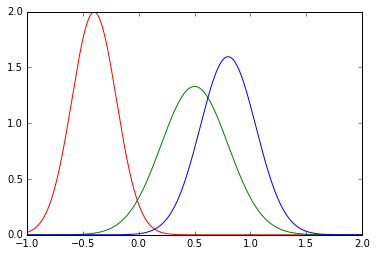

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

x = np.linspace(-1, 2, 5000)

for y, color in zip(p_yIx, ['r', 'g', 'b']):
    plt.plot(x, y(x), color)

plt.show()